In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
from zmq.constants import NULL
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [131]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

# Data Exploration and Data Cleaning


1. shape，datatype and data sample
2. feature name and meaning
3. Medical data result translation
3. nunique，duplication check
4. null cell check and drop
6. mean, std, min, count, 25%, 50%, 75%, max

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [133]:
df.shape

(8763, 26)

In [134]:
df.head(10)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   
5    ZOO7941   54  Female          297         172/86          48         1   
6    WYV0966   90    Male          358         102/73          84         0   
7    XXM0972   84    Male          220         131/68         107         0   
8    XCQ5937   20    Male          145        144/105          68         1   
9    FTJ5456   43  Female          248         160/70          55         0   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   
5               1        1        0  ...                 7.798752  241339   
6               0        1        0  ...                 0.627356  190450   
7               0        1        1  ...                10.543780  122093   
8               0        1        1  ...                11.348787   25086   
9               1        1        1  ...                 4.055115  209703   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   
5  20.146840            795                                5   
6  28.885811            284                                4   
7  22.221862            370                                6   
8  35.809901            790                                7   
9  22.558917            232                                7   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   
5                   10    Germany         Europe  Northern Hemisphere   
6                   10     Canada  North America  Northern Hemisphere   
7                    7      Japan           Asia  Northern Hemisphere   
8                    4     Brazil  South America  Southern Hemisphere   
9                    7      Japan           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  1  
6                  1  
7                  1  
8                  0  
9                  0  

[10 rows x 26 columns]

In [135]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [136]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [137]:
# check duplication
duplicates = df.duplicated()
df[duplicates]

Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]

In [138]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [139]:
# textbased anomalies checking
# Asia, Africa, North America, South America, Europe, Antarctica and Australia
unique_continent = df["Continent"].unique()
unique_continent

array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
       'Australia'], dtype=object)

In [140]:
# data cleaning: format all of the values in 'continent' to be in title case
#
def clean_continent_column(data, column='Continent'):
    """ Clean the 'Continent' column by capitalizing each word """
    data[column] = data[column].str.title()
    return data


In [141]:
file_path = 'heart_attack_prediction_dataset.csv'
clean_data = clean_continent_column(df)
clean_data.to_csv(file_path, index=False)
print("Clean data has been saved to the file.")

Clean data has been saved to the file.


# Label Encoding

In [142]:
import re

# convert Heart Rate number to level
# Low: < 60
# Normal: 60 to 100
# High: > 100
def determin_heart_rate_level(row):
  if row['Heart Rate'] < 60:
    return 'Low'
  elif 60<= row['Heart Rate'] <= 100:
    return 'Normal'
  else:
    return 'High'


# convert Cholesterol number to level
# Normal: < 200
# Borderline Heigh: 200 to 239
# High: > 239
def determin_cholesterol_level(row):
  if row['Cholesterol'] < 200:
    return 'Normal'
  elif 200 <= row['Cholesterol'] <= 239:
    return 'Borderline Heigh'
  else:
    return 'High'


# convert Blood Pressure number to level
# Normal: systolic Below 120 and diastolic < 80.
# Elevated: systolic 120 to 129 and diastolic < 80.
# Stage-1 high blood pressure: systolic 130 to 139 or diastolic 80 to 89.
# Stage-2 high blood pressure: systolic >=140 or diastolic >=90.
# Hypertension Crisis: systolic > 180 and/or diastolic > 120.
def determin_blood_presure_level(row):
  cell_value = row['Blood Pressure']
  regx = r'\d+/\d+'
  if re.match(regx, cell_value):
    systolic, diastolic = get_systolic_and_diastolic(row)
    systolic = int(systolic)
    diastolic = int(diastolic)
    if systolic < 120 and diastolic < 80:
      return 'Normal'
    elif 120 <= systolic <= 129 and diastolic < 80:
      return 'Elevated'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
      return 'Stage-1'
    elif 140 <= systolic or 90 <= diastolic:
      return 'Stage-2'
    elif 180 < systolic or 120 < diastolic:
      return 'Hypertension'
  return pd.NA


def get_systolic_and_diastolic(row):
  systolic,diastolic = row['Blood Pressure'].split('/')
  return [systolic,diastolic]

def get_systolic(row):
  return pd.to_numeric(get_systolic_and_diastolic(row)[0])

def get_diastolic(row):
  return pd.to_numeric(get_systolic_and_diastolic(row)[1])

# convert Triglycerides number to level
# Normal: < 150
# Borderline Heigh: 200 to 499
# High: > 499
def determin_triglyceride_level(row):
  if row['Triglycerides'] < 150:
    return 'Normal'
  elif 150 <= row['Triglycerides'] <= 199:
    return 'Borderline Heigh'
  elif 200 <= row['Triglycerides'] <= 499:
    return 'Heigh'
  else:
    return 'Very High'


# Female:0
# Male:1
def sex_converter(row):
  if row['Sex'] == 'Female':
    return False
  elif row['Sex'] == 'Male':
    return True
  return pd.NA

# Southern Hemisphere - 0
# Northern Hemisphere -1
def hem_converter(row):
  if row['Hemisphere'] == 'Southern Hemisphere':
    return False
  elif row['Hemisphere'] == 'Northern Hemisphere':
    return True
  return pd.NA


#BMI < 18.5: 0
#18.5<= BMI <= 24.9: 1
#25<= BMI <=29.9: 2
# >=30: 3
def bmi_converter(row):
  cell_value = row['BMI']
  if cell_value < 18.5:
    return 0
  elif 18.5<= cell_value < 25:
    return 1
  elif 25<= cell_value < 30:
    return 2
  elif 30<= cell_value:
    return 3
  return pd.NA


# exrcise hours per week / physical activity days per week
def has_physical_activity_per_week(row):
  return row['Physical Activity Days Per Week'] > 0


# check unhelathy diet based on Diet
# Unhelathy: True
# Average and Healthy: False
def get_unhealthy_diet(row):
  return row['Diet'] == "Unhealthy"

# check helathy diet based on Diet
# helathy: True
# Average and Unhealthy: False
def get_healthy_diet(row):
  return row['Diet'] == "Healthy"


def drop_by_column_name(column_name_list, df):
  for col in column_name_list:
    df.drop(col, axis=1, inplace=True)

In [143]:
# convert medical result to levels and  new columns for data expansion
df['Heart Rate Level'] = df.apply(determin_heart_rate_level, axis=1)
df['Cholesterol Level'] = df.apply(determin_cholesterol_level, axis=1)
df['Blood Presure Level'] = df.apply(determin_blood_presure_level, axis=1)
df['Triglyceride Level'] = df.apply(determin_triglyceride_level, axis=1)
df['systolic'] = df.apply(get_systolic,axis=1)
df['diastolic'] = df.apply(get_diastolic,axis=1)

In [144]:
# convert sex: F - 0, M - 1
df['is_Male'] = df.apply(sex_converter, axis=1)

In [145]:
# convert Hemisphere: Southern Hemisphere - 0, Northern Hemisphere -1
unique_hem = df['Hemisphere'].unique()
unique_hem
df['is_northern_hemisphere'] = df.apply(hem_converter, axis=1)

In [146]:
# has physical activity per week
# has: true
# no activity: False
df['Has Activity'] = df.apply(has_physical_activity_per_week, axis=1)

In [147]:
# if Diet = Unhealthy, is_un_healthy_diet = True. else False
df['is_unhealthy_diet'] = df.apply(get_unhealthy_diet, axis=1)

In [148]:
# if Diet = healthy, is_healthy_diet = True. else False
df['is_healthy_diet'] = df.apply(get_healthy_diet, axis=1)

In [149]:
# temporary remove
# BMI Level
# df['BMI Level'] = df.apply(bmi_converter, axis=1)

In [150]:
#drop translated columns
#'PatientID', 'Triglycerides', 'Blood Pressure', 'Cholesterol', 'Heart Rate'
drop_column_name_list = ['Patient ID', 'Sex', 'Blood Pressure']
drop_by_column_name(drop_column_name_list, df)

In [151]:
# final check null cell
df.isnull().sum()

Age                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Heart Rate Level                   0
Cholesterol Level                  0
Blood Presure Level                0
Triglyceride Level                 0
s

In [152]:
# convert int64 to boolean
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Family History'] = df['Family History'].astype(bool)
df['Smoking'] = df['Smoking'].astype(bool)
df['Obesity'] = df['Obesity'].astype(bool)
df['Alcohol Consumption'] = df['Alcohol Consumption'].astype(bool)
df['Previous Heart Problems'] = df['Previous Heart Problems'].astype(bool)
df['Medication Use'] = df['Medication Use'].astype(bool)
df['Heart Attack Risk'] = df['Heart Attack Risk'].astype(bool)

In [153]:
df.dtypes
df3 = df.copy()
df4 = df.copy()
df_final = df.copy()

In [154]:
df.describe()

Age  Cholesterol   Heart Rate  Exercise Hours Per Week  \
count  8763.000000  8763.000000  8763.000000              8763.000000   
mean     53.707977   259.877211    75.021682                10.014284   
std      21.249509    80.863276    20.550948                 5.783745   
min      18.000000   120.000000    40.000000                 0.002442   
25%      35.000000   192.000000    57.000000                 4.981579   
50%      54.000000   259.000000    75.000000                10.069559   
75%      72.000000   330.000000    93.000000                15.050018   
max      90.000000   400.000000   110.000000                19.998709   

       Stress Level  Sedentary Hours Per Day         Income          BMI  \
count   8763.000000              8763.000000    8763.000000  8763.000000   
mean       5.469702                 5.993690  158263.181901    28.891446   
std        2.859622                 3.466359   80575.190806     6.319181   
min        1.000000                 0.001263   20062.000000    18.002337   
25%        3.000000                 2.998794   88310.000000    23.422985   
50%        5.000000                 5.933622  157866.000000    28.768999   
75%        8.000000                 9.019124  227749.000000    34.324594   
max       10.000000                11.999313  299954.000000    39.997211   

       Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
count    8763.000000                      8763.000000          8763.000000   
mean      417.677051                         3.489672             7.023508   
std       223.748137                         2.282687             1.988473   
min        30.000000                         0.000000             4.000000   
25%       225.500000                         2.000000             5.000000   
50%       417.000000                         3.000000             7.000000   
75%       612.000000                         5.000000             9.000000   
max       800.000000                         7.000000            10.000000   

          systolic    diastolic  
count  8763.000000  8763.000000  
mean    135.075659    85.156111  
std      26.349976    14.676565  
min      90.000000    60.000000  
25%     112.000000    72.000000  
50%     135.000000    85.000000  
75%     158.000000    98.000000  
max     180.000000   110.000000

In [155]:
filter_df = df[df["Heart Attack Risk"]==True]
filter_df.describe()

Age  Cholesterol   Heart Rate  Exercise Hours Per Week  \
count  3139.000000  3139.000000  3139.000000              3139.000000   
mean     53.890092   261.970373    74.904747                10.100466   
std      21.352881    80.817186    20.599156                 5.810985   
min      18.000000   120.000000    40.000000                 0.005109   
25%      35.000000   194.000000    57.000000                 5.024571   
50%      54.000000   261.000000    75.000000                10.292091   
75%      73.000000   333.000000    92.000000                15.144511   
max      90.000000   400.000000   110.000000                19.997012   

       Stress Level  Sedentary Hours Per Day         Income          BMI  \
count   3139.000000              3139.000000    3139.000000  3139.000000   
mean       5.453966                 5.967648  159301.479133    28.891617   
std        2.836084                 3.489638   80709.501243     6.328968   
min        1.000000                 0.001529   20531.000000    18.023511   
25%        3.000000                 2.917796   89194.000000    23.425422   
50%        5.000000                 5.898037  159299.000000    28.717106   
75%        8.000000                 8.977283  230079.500000    34.479778   
max       10.000000                11.999313  299954.000000    39.997211   

       Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
count    3139.000000                      3139.000000          3139.000000   
mean      420.812998                         3.474355             6.974196   
std       226.782120                         2.313584             1.970376   
min        30.000000                         0.000000             4.000000   
25%       220.000000                         1.000000             5.000000   
50%       423.000000                         3.000000             7.000000   
75%       618.000000                         6.000000             9.000000   
max       800.000000                         7.000000            10.000000   

          systolic    diastolic  
count  3139.000000  3139.000000  
mean    135.731125    85.008601  
std      26.366763    14.539026  
min      90.000000    60.000000  
25%     113.000000    72.000000  
50%     136.000000    85.000000  
75%     159.000000    97.000000  
max     180.000000   110.000000

In [156]:
filter_df = df[df["Heart Attack Risk"]==False]
filter_df.describe()

Age  Cholesterol   Heart Rate  Exercise Hours Per Week  \
count  5624.000000  5624.000000  5624.000000              5624.000000   
mean     53.606330   258.708926    75.086949                 9.966182   
std      21.192815    80.872616    20.525536                 5.768444   
min      18.000000   120.000000    40.000000                 0.002442   
25%      35.000000   190.000000    57.000000                 4.960369   
50%      54.000000   258.000000    75.000000                 9.914220   
75%      72.000000   328.000000    93.000000                15.025849   
max      90.000000   400.000000   110.000000                19.998709   

       Stress Level  Sedentary Hours Per Day         Income          BMI  \
count   5624.000000              5624.000000    5624.000000  5624.000000   
mean       5.478485                 6.008225  157683.662873    28.891350   
std        2.872889                 3.453524   80501.486521     6.314276   
min        1.000000                 0.001263   20062.000000    18.002337   
25%        3.000000                 3.015570   87370.250000    23.420893   
50%        5.000000                 5.939222  156962.500000    28.790270   
75%        8.000000                 9.038082  225871.500000    34.267076   
max       10.000000                11.992341  299891.000000    39.993581   

       Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
count    5624.000000                      5624.000000          5624.000000   
mean      415.926743                         3.498222             7.051031   
std       222.037741                         2.265421             1.998148   
min        30.000000                         0.000000             4.000000   
25%       228.000000                         2.000000             5.000000   
50%       414.000000                         3.000000             7.000000   
75%       608.250000                         5.000000             9.000000   
max       800.000000                         7.000000            10.000000   

          systolic    diastolic  
count  5624.000000  5624.000000  
mean    134.709815    85.238442  
std      26.335853    14.753420  
min      90.000000    60.000000  
25%     112.000000    73.000000  
50%     134.000000    85.000000  
75%     158.000000    98.000000  
max     180.000000   110.000000

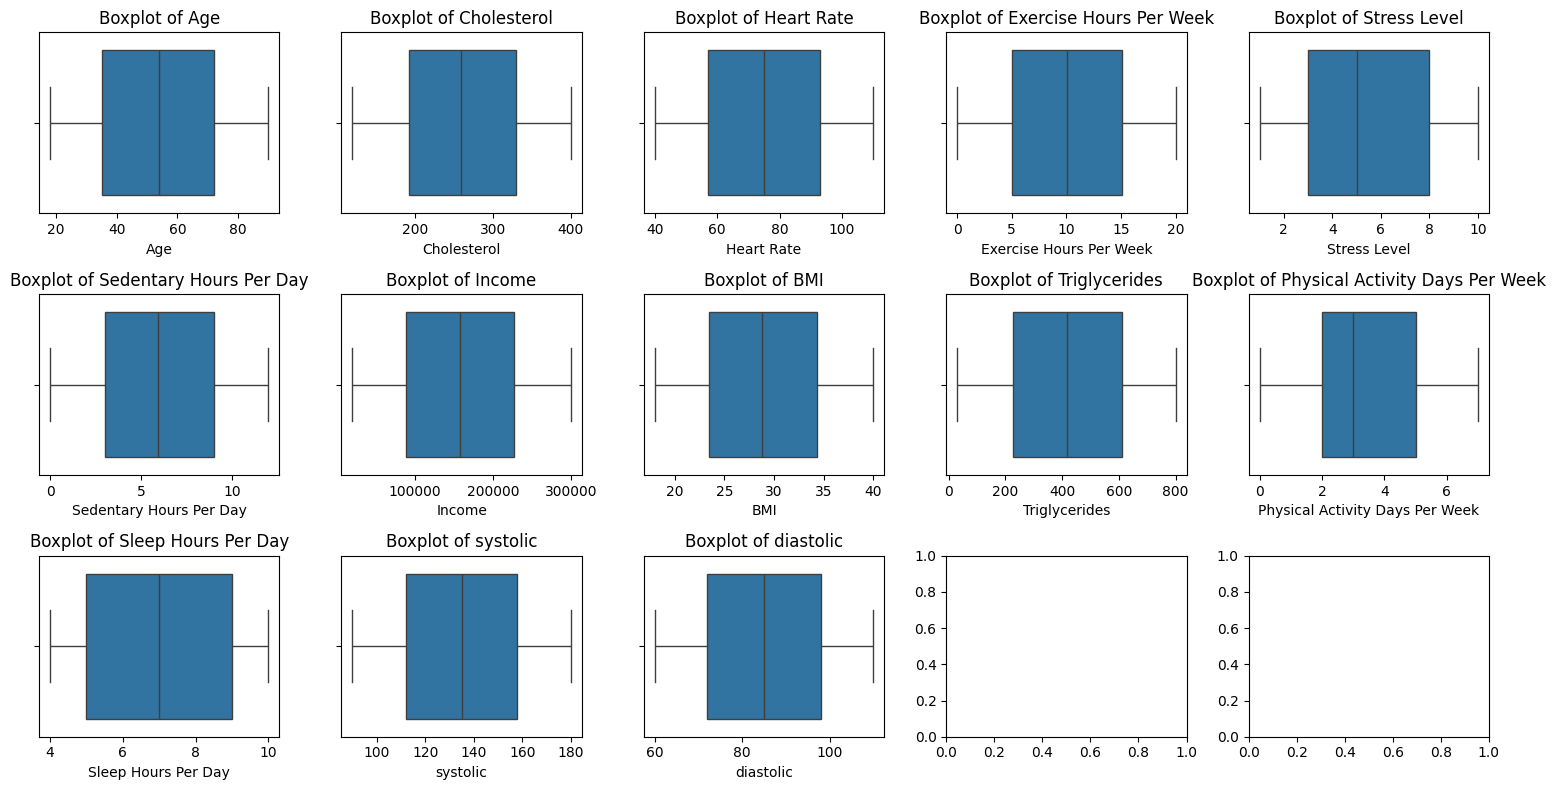

In [157]:
# outlier
# Float: Age, Cholesterol, Heart Rate, Exercise Hours Per Week, Sedentary Hours Per Day, BMI
# columns_to_plot = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', "BMI"]
columns_to_plot = df.select_dtypes(include=['int64','float64'])
num_rows = 3
num_cols = 5

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))
for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, num_cols)
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [158]:
df["Heart Attack Risk"].value_counts()

Heart Attack Risk
False    5624
True     3139
Name: count, dtype: int64

# Exploratory Data Analysis

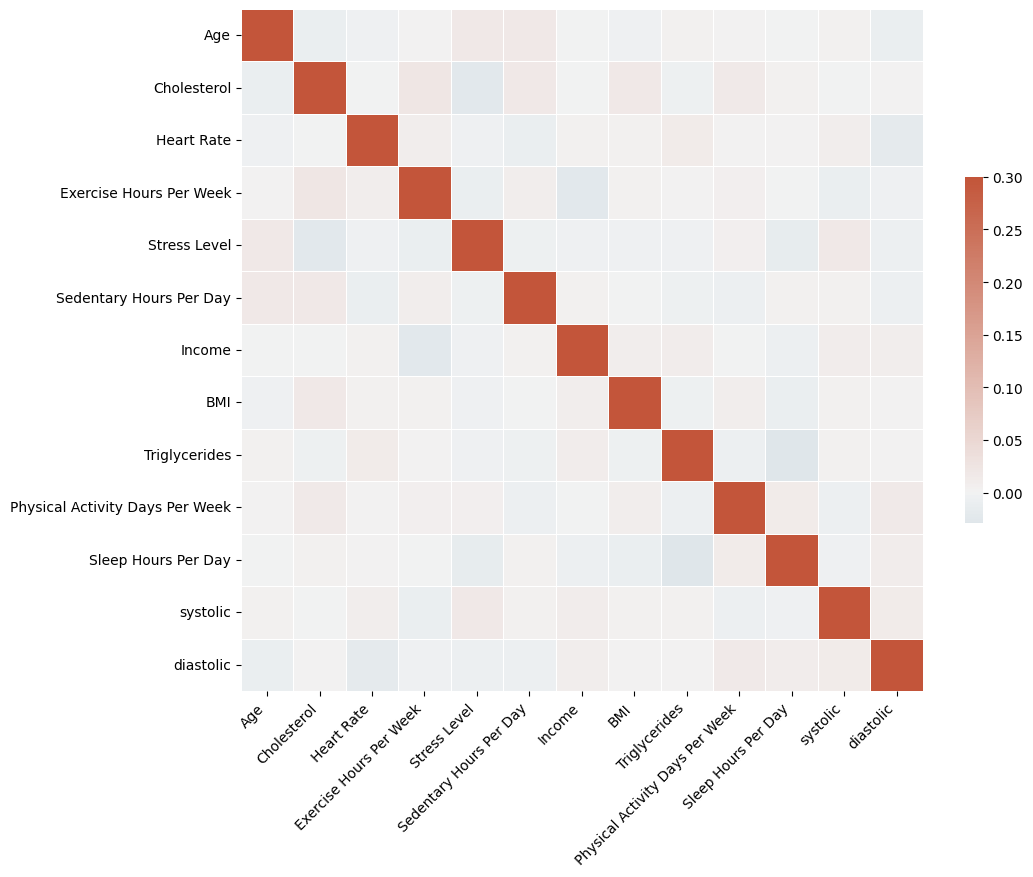

In [159]:
# Drop non-numeric columns if any
df2 = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = df2.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()

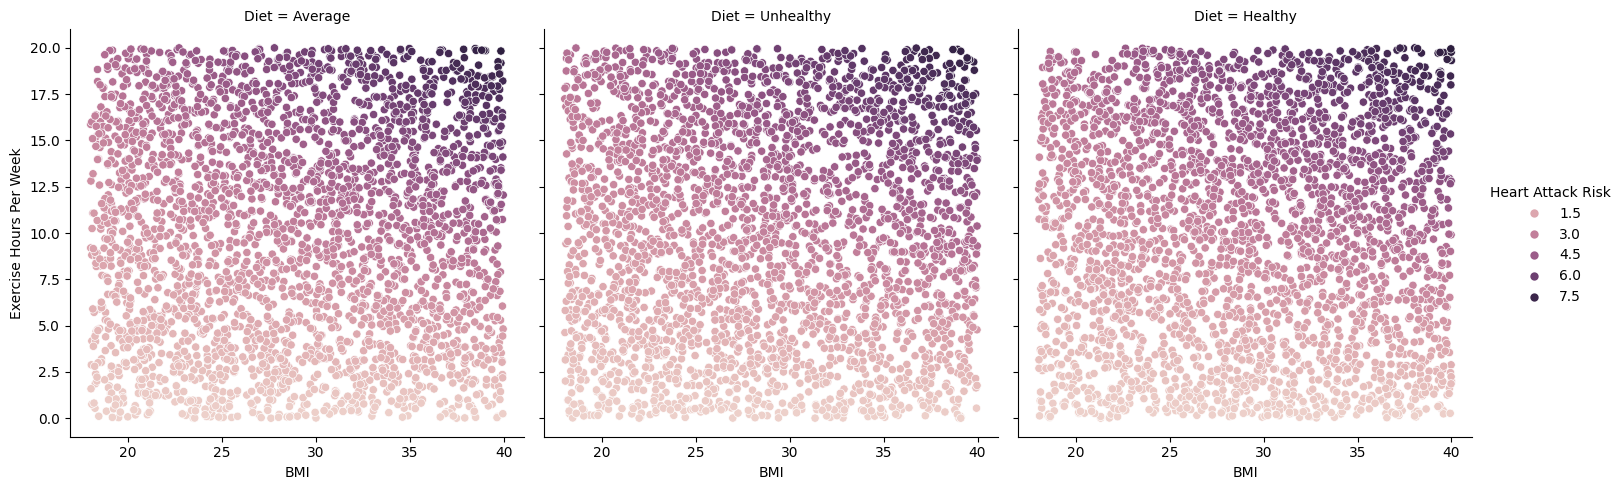

In [160]:
# try to find some insights around BMI

# Calculate the heart attack risk based on the 'BMI' and 'Exercise Hours Per Week' columns
df3['Heart Attack Risk'] = (df3['BMI'] * df3['Exercise Hours Per Week']) / 100

# Plot the relplot
sns.relplot(
    data=df3,
    x="BMI", y="Exercise Hours Per Week", col="Diet",
    hue="Heart Attack Risk",
)

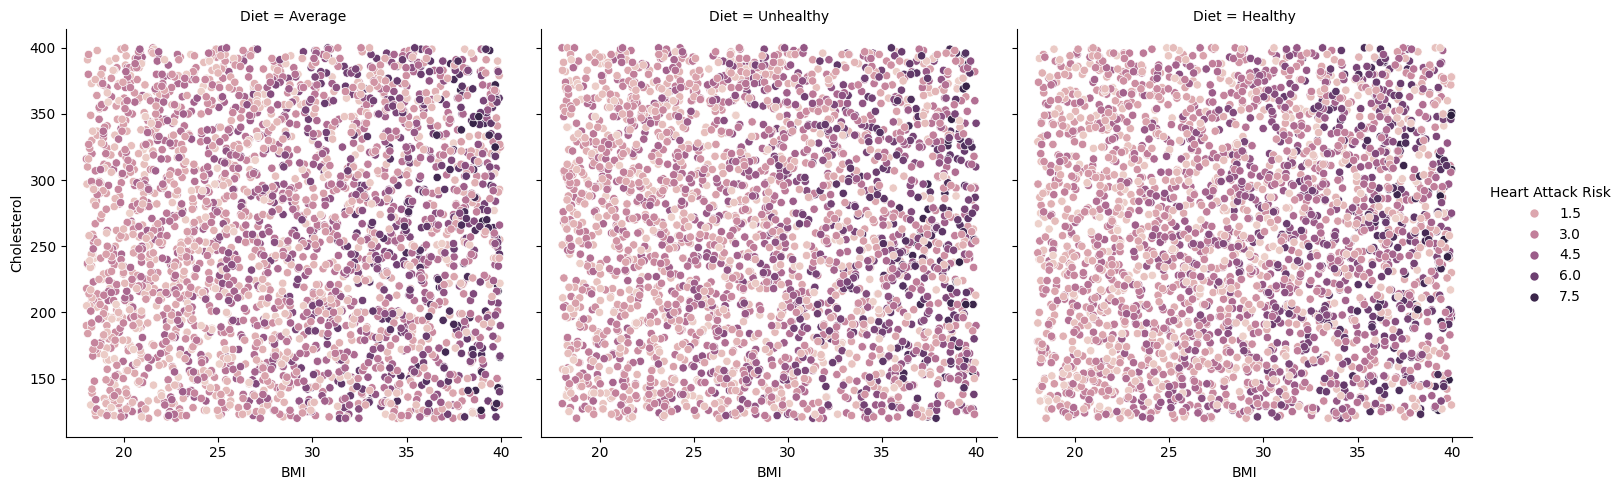

In [161]:
# Cholesterol
sns.relplot(
    data=df3,
    x="BMI", y="Cholesterol", col="Diet",
    hue="Heart Attack Risk",
)

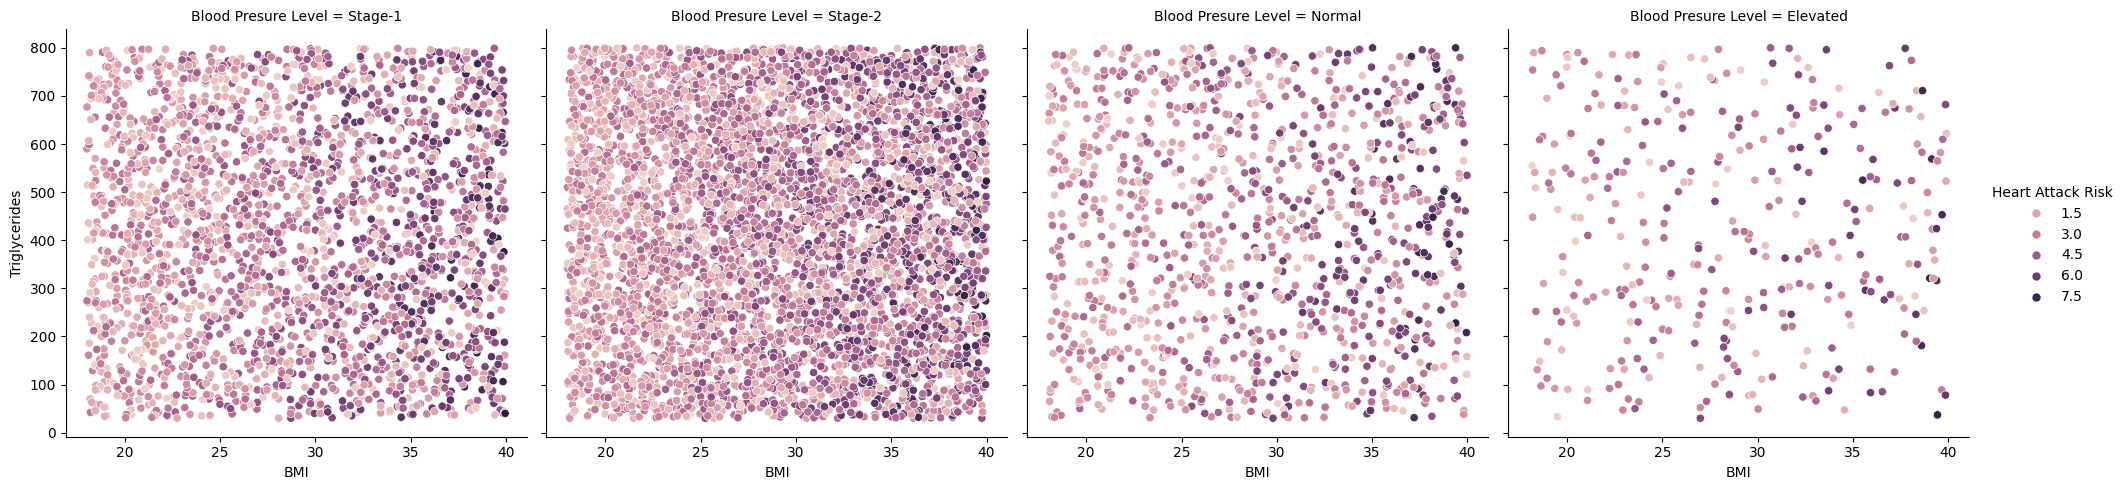

In [162]:
# Triglycerides
sns.relplot(
    data=df3,
    x="BMI", y="Triglycerides", col="Blood Presure Level",
    hue="Heart Attack Risk",
)

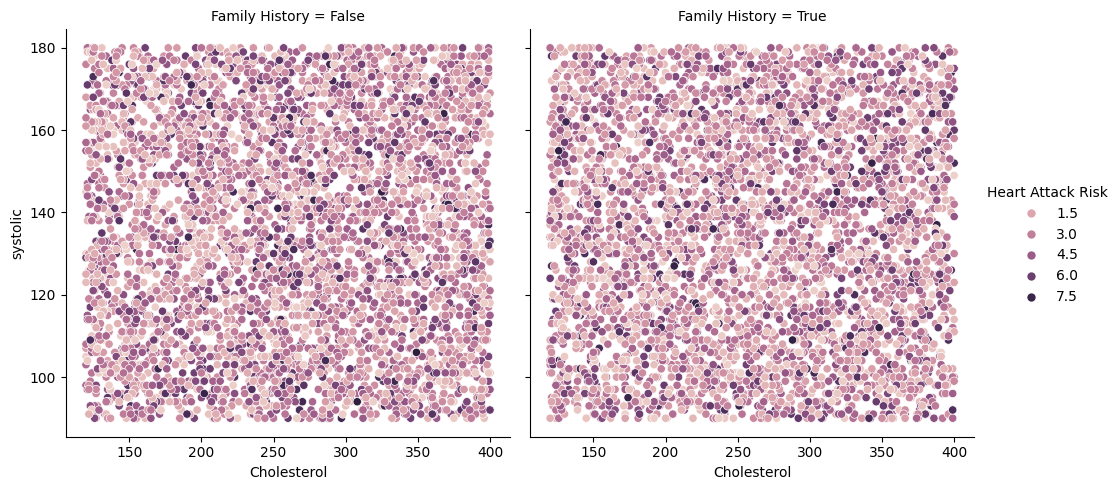

In [163]:
# Heart Rate
sns.relplot(
    data=df3,
    x="Cholesterol", y="systolic", col="Family History",
    hue="Heart Attack Risk",
)

In [164]:
male_count = (df3["is_Male"] == True).sum()
female_count = (df3['is_Male'] == False).sum()
print(male_count)
print(female_count)

6111
2652


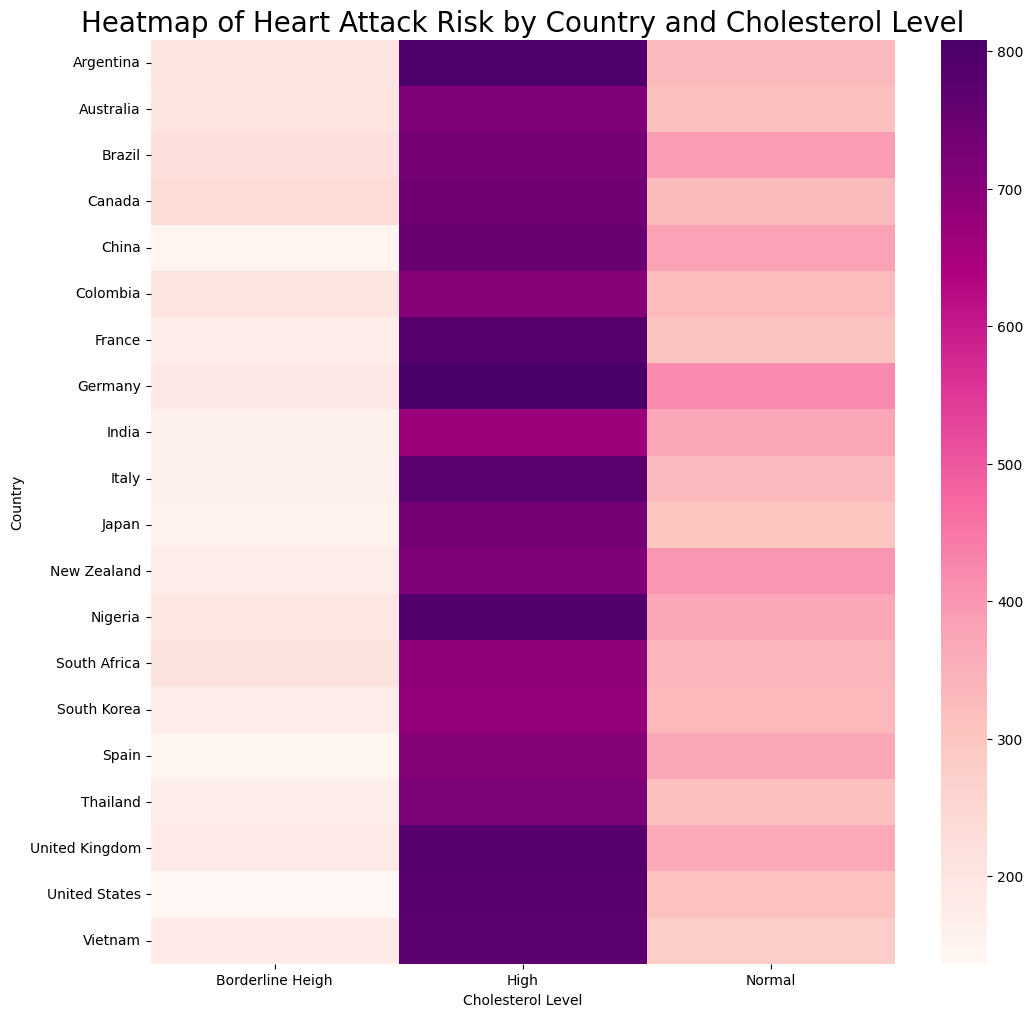

In [165]:
# Heatmap of Heart Attack Risk by Country and Cholesterol Level
groupsub = df3.pivot_table(
    index='Country',
    columns='Cholesterol Level',
    values='Heart Attack Risk',
    aggfunc='sum',
    fill_value=0
)
plt.figure(figsize=(12, 12))
sns.heatmap(groupsub, annot=False, cmap='RdPu', fmt='g')
plt.title('Heatmap of Heart Attack Risk by Country and Cholesterol Level', fontsize=20)
plt.show()


In [166]:
has_count = (df3["Has Activity"] == True).sum()
no_count = (df3['Has Activity'] == False).sum()
print(has_count)
print(no_count)

7698
1065


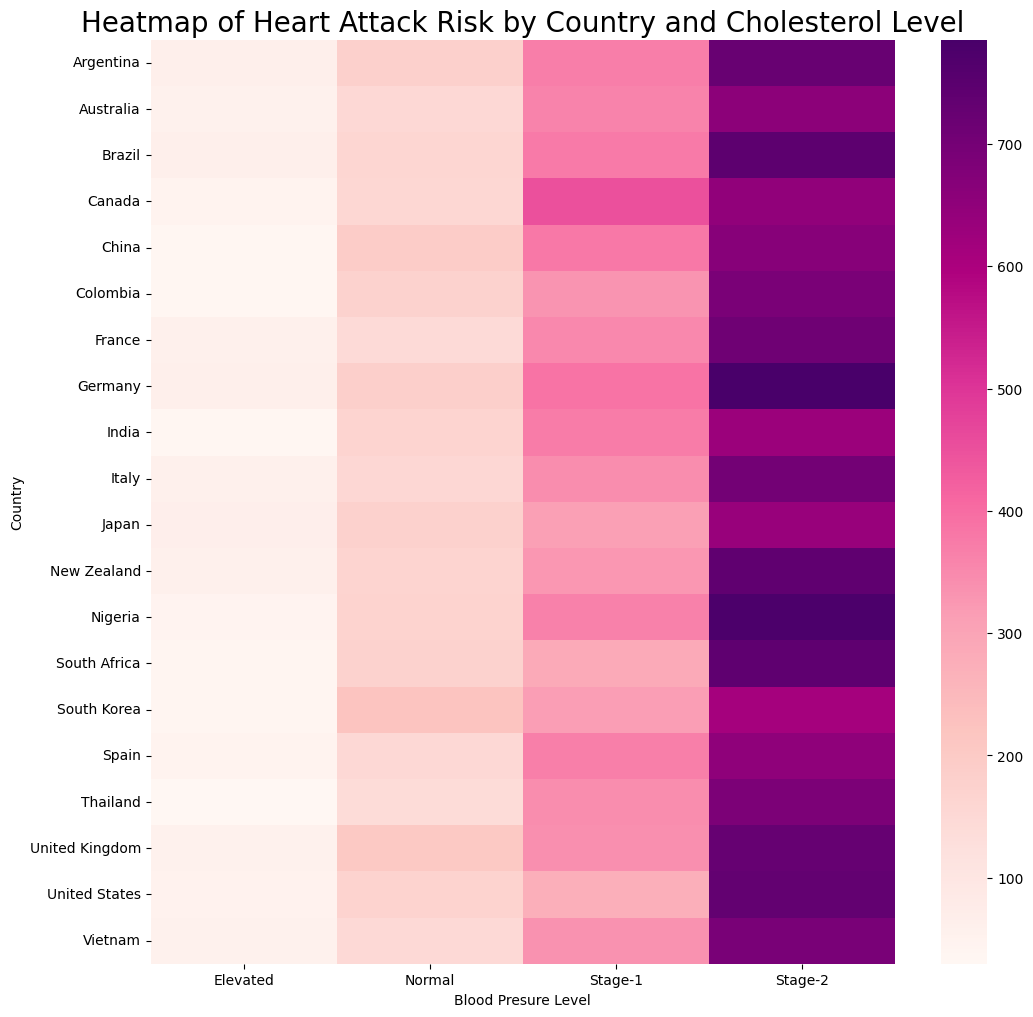

In [167]:
# Heatmap of Heart Attack Risk by Country and Blood Presure Level
groupsub = df3.pivot_table(index='Country', columns='Blood Presure Level', values='Heart Attack Risk', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 12))
sns.heatmap(groupsub, annot=False, cmap='RdPu', fmt='g')
plt.title('Heatmap of Heart Attack Risk by Country and Cholesterol Level', fontsize=20)
plt.show()

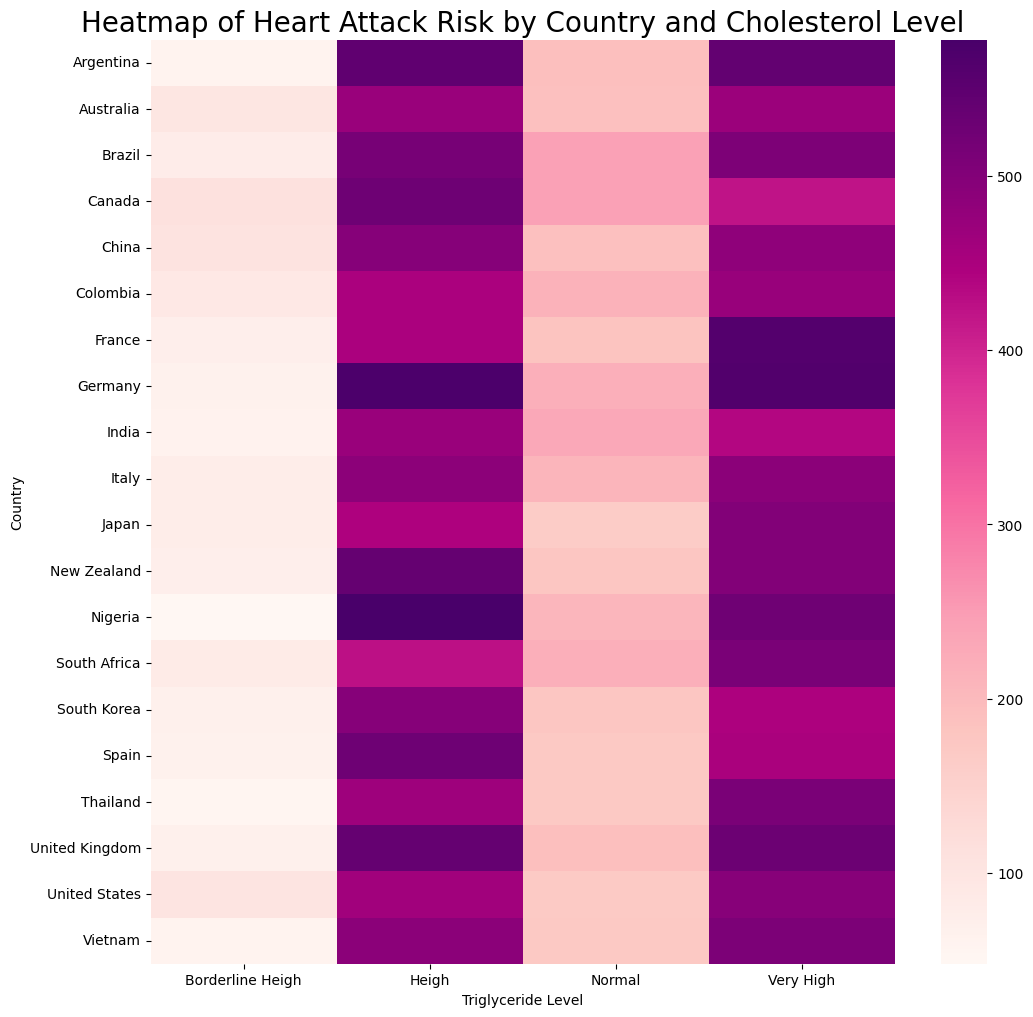

In [168]:
# Heatmap of Heart Attack Risk by Continent and Triglyceride Level Level
groupsub = df3.pivot_table(index='Country', columns='Triglyceride Level', values='Heart Attack Risk', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 12))
sns.heatmap(groupsub, annot=False, cmap='RdPu', fmt='g')
plt.title('Heatmap of Heart Attack Risk by Country and Cholesterol Level', fontsize=20)
plt.show()

In [169]:

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code
df4['Country Code']=alpha3code(df4.Country)
filtered_df = df4[df4['Heart Attack Risk'] == True]
# Group by 'Country' and 'CountryCode', and count occurrences
country_counts = filtered_df.groupby(['Country', 'Country Code']).size().reset_index(name='Heart Attack Risk Count')

# Create a new DataFrame with country counts, names, and CountryCode
country_df = pd.DataFrame(country_counts)
fig = px.choropleth(country_df, locations="Country Code",
                    color="Heart Attack Risk Count", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64


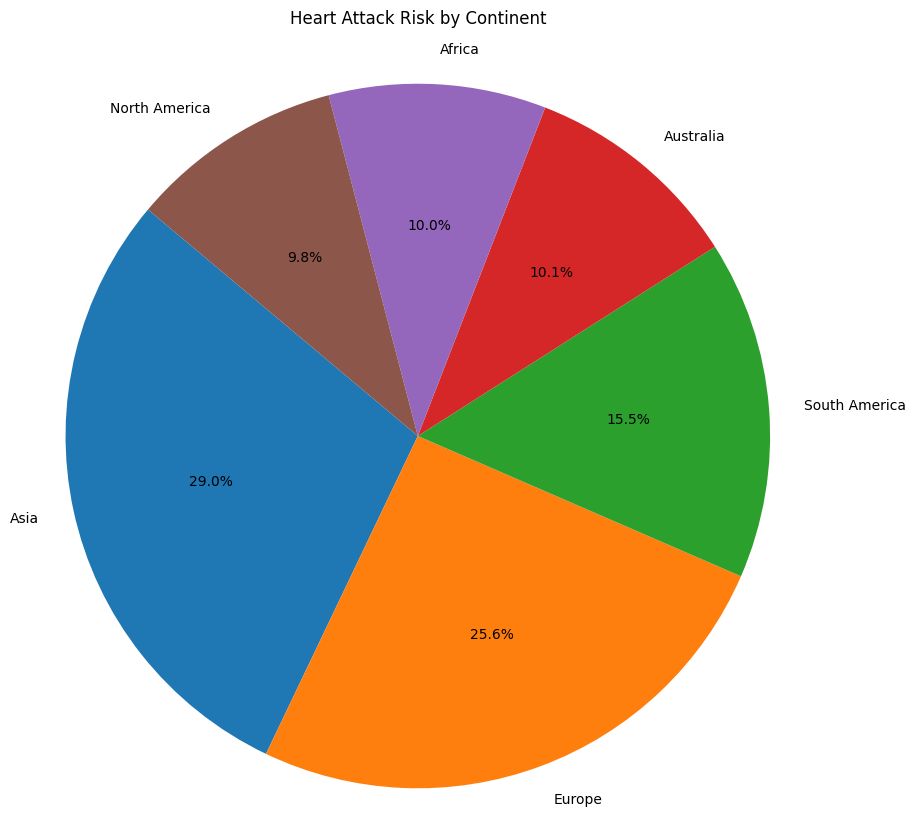

In [170]:
# Group the data by 'Continent' and count the occurrences
continent_counts = df3['Continent'].value_counts()
print(continent_counts)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    continent_counts,
    labels=continent_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Heart Attack Risk by Continent',pad=20)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [171]:
filtered_df = df4[df4['Cholesterol'] >= 240]

# Group by 'Country' and 'CountryCode', and count occurrences
country_counts = filtered_df.groupby(['Country', 'Country Code']).size().reset_index(name='High Cholesterol Count')

# Create a new DataFrame with country counts, names, and CountryCode
country_df = pd.DataFrame(country_counts)

print(country_df)
fig = px.choropleth(country_df, locations="Country Code",
                    color="High Cholesterol Count", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

           Country Country Code  High Cholesterol Count
0        Argentina          ARG                     270
1        Australia          AUS                     257
2           Brazil          BRA                     252
3           Canada          CAN                     244
4            China          CHN                     243
5         Colombia          COL                     243
6           France          FRA                     274
7          Germany          DEU                     266
8            India          IND                     227
9            Italy          ITA                     256
10           Japan          JPN                     256
11     New Zealand          NZL                     235
12         Nigeria          NGA                     260
13    South Africa          ZAF                     242
14     South Korea         None                     234
15           Spain          ESP                     251
16        Thailand          THA                 

In [172]:
# Set seed value
random.seed(1234)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('Heart Attack Risk', axis=1), df5['Heart Attack Risk'], test_size=0.2, random_state=42)



In [173]:
# Decision Tree
X_train_DT = X_train
X_test_DT = X_test
y_train_DT = y_train
y_test_DT = y_test

In [174]:
# Random forest
X_train_RF = X_train
X_test_RF = X_test
y_train_RF = y_train
y_test_RF = y_test

In [175]:
# Gradient boost
X_train_GB = X_train
X_test_GB = X_test
y_train_GB = y_train
y_test_GB = y_test